# Training and testing dataset generation using LeR

* `ler` package is used to generate training and testing datasets.

* It assumes theoretically or observationally available astrophysical models.

* Input parameters for ANN needs all the intrinsic and extrinsic parameters of the source.

* Output parameters are the net optimal SNR of the given network of data.

* The dataset is more accumulated between the SNR range 2-16; with the assumption that SNR threshold cut for detection around 8.

* The dataset is generated for the network of 3 detectors, namely, LIGO A+ sensitivity, consmic exploler, and einsteins telescope.

* Waveform model used is IMRPhenomXPHM with spin and precession effects.

* ANN needs at-least 100000 samples for training and testing.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import contextlib
from ler.rates import LeR
from ler.utils import append_json, get_param_from_json

## CE detector

In [20]:
# initialize the LeR class
ler = LeR(
    npool=6,
    z_max=10,  # becareful with this value
    spin_zero=False,
    spin_precession=True,
    verbose=False,
    mtot_max=500,
    minimum_frequency=10,
    waveform_approximant='IMRPhenomXPHM',
    snr_type='inner_product',
    ifos=['CE'],
)

In [21]:
ler.batch_size = 50000
unlensed_param = ler.unlensed_cbc_statistics(size=200000, resume=True, output_jsonfile='unlensed_param_CE.json')

unlensed params will be store in ./ler_data/unlensed_param_CE.json
chosen batch size = 50000 with total size = 200000
There will be 4 batche(s)
resuming from ./ler_data/unlensed_param_CE.json
Batch no. 3
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 49547/49547 [02:34<00:00, 319.89it/s]


Batch no. 4
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 49529/49529 [02:37<00:00, 314.51it/s]


saving all unlensed_params in ./ler_data/unlensed_param_CE.json 


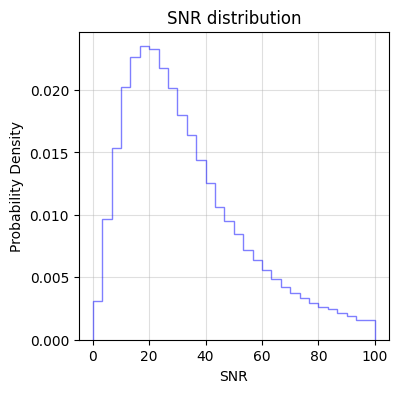

In [22]:
# plot snr distribution
snr = unlensed_param['CE']
snr = snr[(snr > 0) & (snr < 100)]
plt.figure(figsize=(4, 4))
plt.hist(snr, bins=30, density=True, alpha=0.5, color='b', histtype='step')
plt.xlabel('SNR')
plt.ylabel('Probability Density')
plt.title('SNR distribution')
plt.grid(alpha=0.4)
plt.show()

### with uniform inclination angle

In [1]:
ler = LeR(
    npool=6,
    z_max=10,  # becareful with this value
    spin_zero=False,
    spin_precession=True,
    verbose=False,
    mtot_max=500,
    minimum_frequency=10,
    waveform_approximant='IMRPhenomXPHM',
    snr_type='inner_product',
    ifos=['CE'],
    source_priors= {
        'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018',
        'source_frame_masses': 'binary_masses_uniform',
        'zs': 'sampler_uniform',
        'theta_jn': 'sampler_uniform'
        },
    source_priors_params= {
        'merger_rate_density': {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30}, 
        'source_frame_masses': {'m_min': 4.98, 'm_max': 112.5},
        'zs': {'z_min': 0.01, 'z_max': 2},
        'theta_jn': {'min_': 0.0, 'max_': np.pi}
        },
)

In [4]:
ler.batch_size = 50000

len_ = 0
while len_<100000:
    with contextlib.redirect_stdout(None):
        unlensed_param = ler.unlensed_cbc_statistics(size=50000, resume=False)
    snr = unlensed_param['CE']

    idx1 = np.argwhere((snr>0) & (snr<4)).flatten()
    idx3 = np.argwhere((snr>=4) & (snr<6)).flatten()
    idx4 = np.argwhere((snr>=6) & (snr<8)).flatten()
    idx5 = np.argwhere((snr>=8) & (snr<10)).flatten()
    idx6 = np.argwhere((snr>=10) & (snr<12)).flatten()
    idx7 = np.argwhere((snr>=12) & (snr<14)).flatten()
    idx8 = np.argwhere((snr>=14) & (snr<16)).flatten()
    idx16 = np.argwhere(snr>=16).flatten()

    unlensed_param1 = {}
    # unlensed_param2 = {}
    unlensed_param3 = {}
    unlensed_param4 = {}
    unlensed_param5 = {}
    unlensed_param6 = {}
    unlensed_param7 = {}
    unlensed_param8 = {}
    unlensed_param16 = {}
    unlensed_param_joint = {}

    len_idx16 = len(idx1)
    print(f"Number of events snr<4: {len_idx16}")

    for key, value in unlensed_param.items():
        if len(idx3)>len_idx16:
            unlensed_param3[key] = value[idx3][:len_idx16]
        else:
            unlensed_param3[key] = value[idx3]
        if len(idx4)>len_idx16:
            unlensed_param4[key] = value[idx4][:len_idx16]
        else:
            unlensed_param4[key] = value[idx4]
        if len(idx5)>len_idx16:
            unlensed_param5[key] = value[idx5][:len_idx16]
        else:
            unlensed_param5[key] = value[idx5]
        if len(idx6)>len_idx16:
            unlensed_param6[key] = value[idx6][:len_idx16]
        else:
            unlensed_param6[key] = value[idx6]
        if len(idx7)>len_idx16:
            unlensed_param7[key] = value[idx7][:len_idx16]
        else:
            unlensed_param7[key] = value[idx7]
        if len(idx8)>len_idx16:
            unlensed_param8[key] = value[idx8][:len_idx16]
        else:
            unlensed_param8[key] = value[idx8]
        if len(idx16)>len_idx16:
            unlensed_param16[key] = value[idx16][:len_idx16]
        else:
            unlensed_param16[key] = value[idx16]

        unlensed_param1[key] = value[idx1]

        unlensed_param_joint[key] = np.concatenate([unlensed_param1[key], unlensed_param3[key], unlensed_param4[key], unlensed_param5[key], unlensed_param6[key], unlensed_param7[key], unlensed_param8[key], unlensed_param16[key]])

    append_json("ler_data/unlensed_param_CE_uniform.json", unlensed_param_joint, replace=False)
    unlensed_params = get_param_from_json("ler_data/unlensed_param_CE_uniform.json")
    len_ = len(np.array(unlensed_params["CE"]))

    print(f"Number of events: {len_}")

100%|████████████████████████████████████████████████████████| 34766/34766 [00:35<00:00, 990.33it/s]


Number of events snr<4: 35


  0%|                                                                     | 0/34677 [00:00<?, ?it/s]

Number of events: 19097


100%|████████████████████████████████████████████████████████| 34677/34677 [00:35<00:00, 985.11it/s]


Number of events snr<4: 28


  0%|                                                                     | 0/34457 [00:00<?, ?it/s]

Number of events: 19321


100%|████████████████████████████████████████████████████████| 34457/34457 [00:34<00:00, 998.58it/s]


Number of events snr<4: 32


  0%|                                                                     | 0/34694 [00:00<?, ?it/s]

Number of events: 19577


100%|████████████████████████████████████████████████████████| 34694/34694 [00:35<00:00, 979.01it/s]


Number of events snr<4: 27


  0%|                                                                     | 0/34885 [00:00<?, ?it/s]

Number of events: 19793


100%|███████████████████████████████████████████████████████| 34885/34885 [00:34<00:00, 1005.38it/s]


Number of events snr<4: 22


  0%|                                                                     | 0/34764 [00:00<?, ?it/s]

Number of events: 19969


100%|████████████████████████████████████████████████████████| 34764/34764 [00:35<00:00, 975.33it/s]


Number of events snr<4: 30


  0%|                                                                     | 0/34729 [00:00<?, ?it/s]

Number of events: 20209


100%|████████████████████████████████████████████████████████| 34729/34729 [00:34<00:00, 996.09it/s]


Number of events snr<4: 35


  0%|                                                                     | 0/35048 [00:00<?, ?it/s]

Number of events: 20489


100%|████████████████████████████████████████████████████████| 35048/35048 [00:35<00:00, 993.08it/s]


Number of events snr<4: 34


  0%|                                                                     | 0/34683 [00:00<?, ?it/s]

Number of events: 20761


100%|████████████████████████████████████████████████████████| 34683/34683 [00:35<00:00, 987.00it/s]


Number of events snr<4: 41


  0%|                                                                     | 0/34790 [00:00<?, ?it/s]

Number of events: 21085


100%|███████████████████████████████████████████████████████| 34790/34790 [00:34<00:00, 1018.32it/s]


Number of events snr<4: 29


  0%|                                                                     | 0/34782 [00:00<?, ?it/s]

Number of events: 21317


100%|███████████████████████████████████████████████████████| 34782/34782 [00:34<00:00, 1000.61it/s]


Number of events snr<4: 27


  0%|                                                                     | 0/34511 [00:00<?, ?it/s]

Number of events: 21533


  5%|██▌                                                      | 1582/34511 [00:05<01:47, 307.73it/s]


KeyboardInterrupt: 

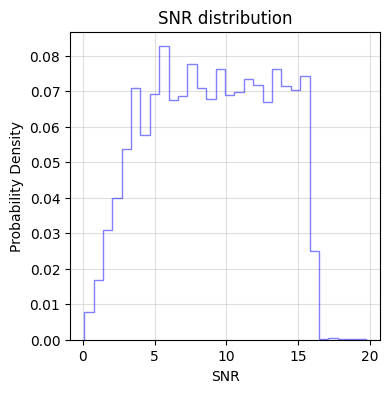

In [5]:
unlensed_param = get_param_from_json("ler_data/unlensed_param_CE_uniform")
# plot snr distribution
snr = unlensed_param['CE']
snr = snr[(snr > 0) & (snr < 20)]
plt.figure(figsize=(4, 4))
plt.hist(snr, bins=30, density=True, alpha=0.5, color='b', histtype='step')
plt.xlabel('SNR')
plt.ylabel('Probability Density')
plt.title('SNR distribution')
plt.grid(alpha=0.4)
plt.show()

### Focus on samples between snr 4 and 16

In [ ]:
# uncomment the following line to generate the data

# This is data collection based of 'optimal snr net' range
 
ler.batch_size = 50000

len_ = 0
while len_<200000:
    with contextlib.redirect_stdout(None):
        unlensed_param = ler.unlensed_cbc_statistics(size=50000, resume=False)
    snr = unlensed_param['CE']

    idx1 = np.argwhere((snr>0) & (snr<4)).flatten()
    idx3 = np.argwhere((snr>=4) & (snr<6)).flatten()
    idx4 = np.argwhere((snr>=6) & (snr<8)).flatten()
    idx5 = np.argwhere((snr>=8) & (snr<10)).flatten()
    idx6 = np.argwhere((snr>=10) & (snr<12)).flatten()
    idx7 = np.argwhere((snr>=12) & (snr<14)).flatten()
    idx8 = np.argwhere((snr>=14) & (snr<16)).flatten()
    idx16 = np.argwhere(snr>=16).flatten()

    unlensed_param1 = {}
    # unlensed_param2 = {}
    unlensed_param3 = {}
    unlensed_param4 = {}
    unlensed_param5 = {}
    unlensed_param6 = {}
    unlensed_param7 = {}
    unlensed_param8 = {}
    unlensed_param16 = {}
    unlensed_param_joint = {}

    len_idx16 = len(idx1)
    print(f"Number of events snr<4: {len_idx16}")

    for key, value in unlensed_param.items():
        # if len(idx1)>len_idx16:
        #     unlensed_param1[key] = value[idx1][:len_idx16]
        # else:
        #     unlensed_param1[key] = value[idx1]
        # if len(idx2)>len_idx16:
        #     unlensed_param2[key] = value[idx2][:len_idx16]
        # else:
        #     unlensed_param2[key] = value[idx2]
        if len(idx3)>len_idx16:
            unlensed_param3[key] = value[idx3][:len_idx16]
        else:
            unlensed_param3[key] = value[idx3]
        if len(idx4)>len_idx16:
            unlensed_param4[key] = value[idx4][:len_idx16]
        else:
            unlensed_param4[key] = value[idx4]
        if len(idx5)>len_idx16:
            unlensed_param5[key] = value[idx5][:len_idx16]
        else:
            unlensed_param5[key] = value[idx5]
        if len(idx6)>len_idx16:
            unlensed_param6[key] = value[idx6][:len_idx16]
        else:
            unlensed_param6[key] = value[idx6]
        if len(idx7)>len_idx16:
            unlensed_param7[key] = value[idx7][:len_idx16]
        else:
            unlensed_param7[key] = value[idx7]
        if len(idx8)>len_idx16:
            unlensed_param8[key] = value[idx8][:len_idx16]
        else:
            unlensed_param8[key] = value[idx8]
        if len(idx16)>len_idx16:
            unlensed_param16[key] = value[idx16][:len_idx16]
        else:
            unlensed_param16[key] = value[idx16]

        unlensed_param1[key] = value[idx1]

        unlensed_param_joint[key] = np.concatenate([unlensed_param1[key], unlensed_param3[key], unlensed_param4[key], unlensed_param5[key], unlensed_param6[key], unlensed_param7[key], unlensed_param8[key], unlensed_param16[key]])

    append_json("ler_data/joint_new_optsnr_CE.json", unlensed_param_joint, replace=False)
    unlensed_params = get_param_from_json("ler_data/joint_new_optsnr_CE.json")
    len_ = len(np.array(unlensed_params["CE"]))

    print(f"Number of events: {len_}")

In [8]:
from ler.utils import add_dict_values
# get params
unlensed_params1 = get_param_from_json("ler_data/unlensed_param_CE.json")
unlensed_params2 = get_param_from_json("ler_data/joint_new_optsnr_CE.json")
unlensed_params3 = get_param_from_json("ler_data/unlensed_param_CE_uniform.json")
unlensed_params = add_dict_values(unlensed_params1, unlensed_params2)
unlensed_params = add_dict_values(unlensed_params, unlensed_params3)
del unlensed_params1, unlensed_params2, unlensed_params3

Number of events: 424789


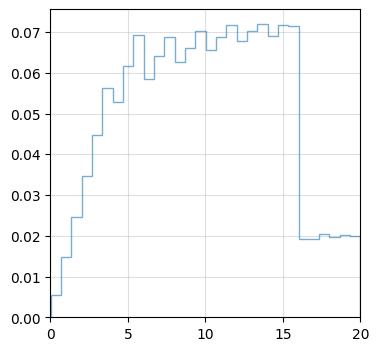

In [9]:
# visualize the data
import matplotlib.pyplot as plt
#unlensed_params = get_param_from_json("joint_new_optsnr.json")
test = np.array(unlensed_params['CE'])
print(f"Number of events: {len(test)}")
test = test[(test<20) & (test>0)]
plt.figure(figsize=(4,4))
plt.hist(test, bins=30, alpha=0.6, histtype='step', density=True)
plt.xlim(0,20)
plt.grid(alpha=0.4)
plt.show()

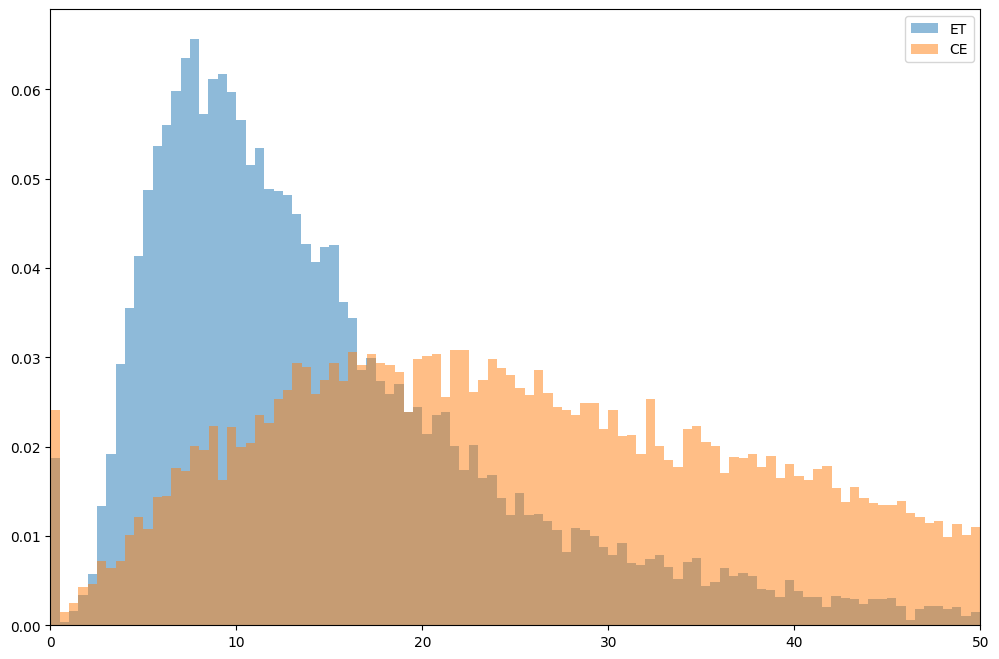

In [36]:
ET1 = unlensed_param['ET1']
ET2 = unlensed_param['ET2']
ET3 = unlensed_param['ET3']
ET = np.sqrt(ET1**2 + ET2**2 + ET3**2)
idx = ET < 50
ET = ET[idx]
CE = unlensed_param['CE']
idx = CE < 50
CE = CE[idx]    

# plt hist
plt.figure(figsize=(12, 8))
plt.hist(ET, bins=100, alpha=0.5, label='ET', density=True)
plt.hist(CE, bins=100, alpha=0.5, label='CE', density=True)
plt.xlim(0, 50)
plt.legend()
plt.show()


## ET

In [43]:
ler.batch_size = 100000
unlensed_param = ler.unlensed_cbc_statistics(size=400000, resume=True, output_jsonfile='unlensed_param_ET.json') 

unlensed params will be store in ./ler_data/unlensed_param_ET.json
chosen batch size = 100000 with total size = 400000
There will be 4 batche(s)
resuming from ./ler_data/unlensed_param_ET.json
Batch no. 3
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 99032/99032 [05:39<00:00, 292.12it/s]


Batch no. 4
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 99127/99127 [05:36<00:00, 294.87it/s]


saving all unlensed_params in ./ler_data/unlensed_param_ET.json 


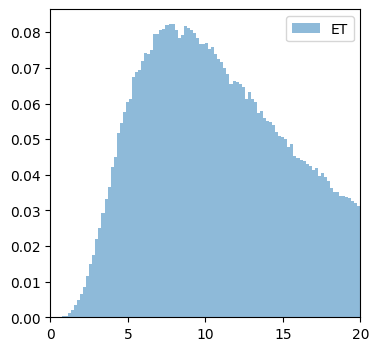

In [56]:
# read the json file
unlensed_param = get_param_from_json('ler_data/unlensed_param_ET.json')

ET1 = unlensed_param['ET1']
ET2 = unlensed_param['ET2']
ET3 = unlensed_param['ET3']
ET = np.sqrt(ET1**2 + ET2**2 + ET3**2)
idx = (ET < 20) & (ET > 0)
ET = ET[idx]

# plt hist
plt.figure(figsize=(4, 4))
plt.hist(ET, bins=100, alpha=0.5, label='ET', density=True)
plt.xlim(0, 20)
plt.legend()
plt.show()


In [50]:
# initialize the LeR class
ler = LeR(
    npool=8,
    z_max=10,  # becareful with this value
    spin_zero=False,
    spin_precession=True,
    verbose=False,
    mtot_max=500,
    minimum_frequency=10,
    waveform_approximant='IMRPhenomXPHM',
    snr_type='inner_product',
    ifos=['ET', 'CE'],
    source_priors= {
        'source_frame_masses': 'binary_masses_uniform',
        'zs': 'sampler_uniform',
        'theta_jn': 'sampler_uniform'
        },
    source_priors_params= {
        'source_frame_masses': {'m_min': 4.98, 'm_max': 112.5},
        'zs': {'z_min': 0.001, 'z_max': 10},
        'theta_jn': {'min_': 0.0, 'max_': np.pi}
        },
)

In [52]:
ler.batch_size = 10000
unlensed_param = ler.unlensed_cbc_statistics(size=10000, resume=False, output_jsonfile='unlensed_param_ET_uniform.json') 

unlensed params will be store in ./ler_data/unlensed_param_ET_uniform.json
chosen batch size = 10000 with total size = 10000
There will be 1 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|██████████████████████████████████████████████████████████| 6885/6885 [00:11<00:00, 588.75it/s]


saving all unlensed_params in ./ler_data/unlensed_param_ET_uniform.json 


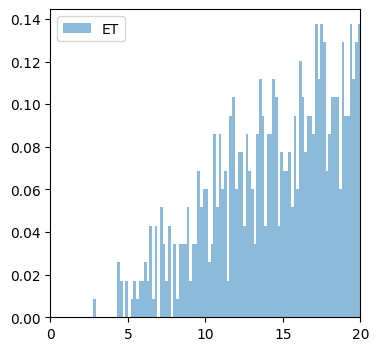

In [55]:
# read the json file
unlensed_param = get_param_from_json('ler_data/unlensed_param_ET_uniform.json')

ET1 = unlensed_param['ET1']
ET2 = unlensed_param['ET2']
ET3 = unlensed_param['ET3']
ET = np.sqrt(ET1**2 + ET2**2 + ET3**2)
idx = (ET < 20) & (ET > 0)
ET = ET[idx]

# plt hist
plt.figure(figsize=(4, 4))
plt.hist(ET, bins=100, alpha=0.5, label='ET', density=True)
plt.xlim(0, 20)
plt.legend()
plt.show()

In [3]:
ler = LeR(
    npool=4,
    z_max=10,  # becareful with this value
    spin_zero=False,
    spin_precession=True,
    verbose=False,
    mtot_max=500,
    minimum_frequency=10,
    waveform_approximant='IMRPhenomXPHM',
    snr_type='inner_product',
    ifos=['ET', 'CE'],
)

In [29]:
# uncomment the following line to generate the data

# This is data collection based of 'optimal snr net' range
 
ler.batch_size = 50000

len_ = 0
while len_<200000:
    with contextlib.redirect_stdout(None):
        unlensed_param = ler.unlensed_cbc_statistics(size=50000, resume=False)
    snr = unlensed_param['CE']

    idx1 = np.argwhere((snr>0) & (snr<4)).flatten()
    idx3 = np.argwhere((snr>=4) & (snr<6)).flatten()
    idx4 = np.argwhere((snr>=6) & (snr<8)).flatten()
    idx5 = np.argwhere((snr>=8) & (snr<10)).flatten()
    idx6 = np.argwhere((snr>=10) & (snr<12)).flatten()
    idx7 = np.argwhere((snr>=12) & (snr<14)).flatten()
    idx8 = np.argwhere((snr>=14) & (snr<16)).flatten()
    idx16 = np.argwhere(snr>=16).flatten()

    unlensed_param1 = {}
    # unlensed_param2 = {}
    unlensed_param3 = {}
    unlensed_param4 = {}
    unlensed_param5 = {}
    unlensed_param6 = {}
    unlensed_param7 = {}
    unlensed_param8 = {}
    unlensed_param16 = {}
    unlensed_param_joint = {}

    len_idx16 = len(idx1)
    print(f"Number of events snr<4: {len_idx16}")

    for key, value in unlensed_param.items():
        # if len(idx1)>len_idx16:
        #     unlensed_param1[key] = value[idx1][:len_idx16]
        # else:
        #     unlensed_param1[key] = value[idx1]
        # if len(idx2)>len_idx16:
        #     unlensed_param2[key] = value[idx2][:len_idx16]
        # else:
        #     unlensed_param2[key] = value[idx2]
        if len(idx3)>len_idx16:
            unlensed_param3[key] = value[idx3][:len_idx16]
        else:
            unlensed_param3[key] = value[idx3]
        if len(idx4)>len_idx16:
            unlensed_param4[key] = value[idx4][:len_idx16]
        else:
            unlensed_param4[key] = value[idx4]
        if len(idx5)>len_idx16:
            unlensed_param5[key] = value[idx5][:len_idx16]
        else:
            unlensed_param5[key] = value[idx5]
        if len(idx6)>len_idx16:
            unlensed_param6[key] = value[idx6][:len_idx16]
        else:
            unlensed_param6[key] = value[idx6]
        if len(idx7)>len_idx16:
            unlensed_param7[key] = value[idx7][:len_idx16]
        else:
            unlensed_param7[key] = value[idx7]
        if len(idx8)>len_idx16:
            unlensed_param8[key] = value[idx8][:len_idx16]
        else:
            unlensed_param8[key] = value[idx8]
        if len(idx16)>len_idx16:
            unlensed_param16[key] = value[idx16][:len_idx16]
        else:
            unlensed_param16[key] = value[idx16]

        unlensed_param1[key] = value[idx1]

        unlensed_param_joint[key] = np.concatenate([unlensed_param1[key], unlensed_param3[key], unlensed_param4[key], unlensed_param5[key], unlensed_param6[key], unlensed_param7[key], unlensed_param8[key], unlensed_param16[key]])

    append_json("ler_data/joint_new_optsnr_CE.json", unlensed_param_joint, replace=False)
    unlensed_params = get_param_from_json("ler_data/joint_new_optsnr_CE.json")
    len_ = len(np.array(unlensed_params["CE"]))

    print(f"Number of events: {len_}")

100%|████████████████████████████████████████████████████████| 49570/49570 [02:59<00:00, 275.55it/s]


Number of events snr<4: 722


  0%|                                                                     | 0/49562 [00:00<?, ?it/s]

Number of events: 137488


100%|████████████████████████████████████████████████████████| 49562/49562 [02:56<00:00, 280.47it/s]


Number of events snr<4: 698


  0%|                                                                     | 0/49556 [00:00<?, ?it/s]

Number of events: 143072


100%|████████████████████████████████████████████████████████| 49556/49556 [02:55<00:00, 282.81it/s]


Number of events snr<4: 651


  0%|                                                                     | 0/49568 [00:00<?, ?it/s]

Number of events: 148280


100%|████████████████████████████████████████████████████████| 49568/49568 [02:52<00:00, 286.70it/s]


Number of events snr<4: 727


  0%|                                                                     | 0/49553 [00:00<?, ?it/s]

Number of events: 154096


100%|████████████████████████████████████████████████████████| 49553/49553 [02:51<00:00, 288.47it/s]


Number of events snr<4: 685


  0%|                                                                     | 0/49557 [00:00<?, ?it/s]

Number of events: 159576


100%|████████████████████████████████████████████████████████| 49557/49557 [02:51<00:00, 288.19it/s]


Number of events snr<4: 642


  0%|                                                                     | 0/49562 [00:00<?, ?it/s]

Number of events: 164712


100%|████████████████████████████████████████████████████████| 49562/49562 [02:52<00:00, 287.43it/s]


Number of events snr<4: 665


  0%|                                                                     | 0/49545 [00:00<?, ?it/s]

Number of events: 170032


100%|████████████████████████████████████████████████████████| 49545/49545 [02:50<00:00, 290.35it/s]


Number of events snr<4: 684


  0%|                                                                     | 0/49547 [00:00<?, ?it/s]

Number of events: 175504


100%|████████████████████████████████████████████████████████| 49547/49547 [02:53<00:00, 284.80it/s]


Number of events snr<4: 725


  0%|                                                                     | 0/49541 [00:00<?, ?it/s]

Number of events: 181304


100%|████████████████████████████████████████████████████████| 49541/49541 [02:55<00:00, 281.62it/s]


Number of events snr<4: 677


  0%|                                                                     | 0/49573 [00:00<?, ?it/s]

Number of events: 186720


100%|████████████████████████████████████████████████████████| 49573/49573 [02:54<00:00, 283.73it/s]


Number of events snr<4: 685


  0%|                                                                     | 0/49535 [00:00<?, ?it/s]

Number of events: 192200


100%|████████████████████████████████████████████████████████| 49535/49535 [02:55<00:00, 282.92it/s]


Number of events snr<4: 764


  0%|                                                                     | 0/49533 [00:00<?, ?it/s]

Number of events: 198312


100%|████████████████████████████████████████████████████████| 49533/49533 [02:55<00:00, 281.81it/s]


Number of events snr<4: 618
Number of events: 203256


In [1]:
unlensed_params = get_param_from_json("ler_data/joint_new_optsnr_ET1.json")
np.sum(unlensed_params["optimal_snr_net"]<4)

NameError: name 'get_param_from_json' is not defined

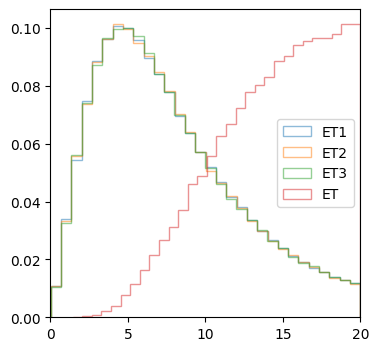

In [15]:
# plot
unlensed_params = get_param_from_json("ler_data/joint_new_optsnr_ET1.json")
optimal_snr_net = unlensed_params["optimal_snr_net"]
snr_ET1 = unlensed_params["ET1"]
snr_ET2 = unlensed_params["ET2"]
snr_ET3 = unlensed_params["ET3"]
idx1 = (snr_ET1 < 20) & (snr_ET1 > 0)
idx2 = (snr_ET2 < 20) & (snr_ET2 > 0)
idx3 = (snr_ET3 < 20) & (snr_ET3 > 0)
idx = (optimal_snr_net < 20) & (optimal_snr_net > 0)


plt.figure(figsize=(4, 4))
plt.hist(snr_ET1[idx1], bins=30, alpha=0.5, label='ET1', density=True, histtype='step')
# plt.hist(snr_ET2[idx], bins=30, alpha=0.5, label='ET2', density=True, histtype='step')
# plt.hist(snr_ET3[idx], bins=30, alpha=0.5, label='ET3', density=True, histtype='step')
# plt.hist(optimal_snr_net[idx], bins=30, alpha=0.5, label='ET', density=True, histtype='step')
plt.hist(snr_ET2[idx2], bins=30, alpha=0.5, label='ET2', density=True, histtype='step')
plt.hist(snr_ET3[idx3], bins=30, alpha=0.5, label='ET3', density=True, histtype='step')
plt.hist(optimal_snr_net[idx], bins=30, alpha=0.5, label='ET', density=True, histtype='step')
plt.xlim(0, 20)
plt.legend()
plt.show()

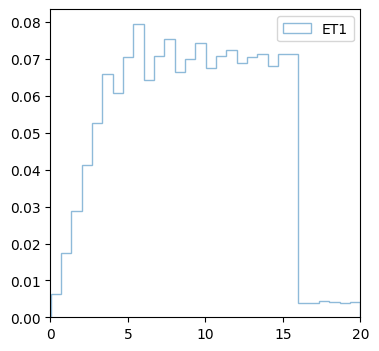

In [4]:
# plot
unlensed_params = get_param_from_json("ler_data/joint_new_optsnr_CE.json")
snr_CE = unlensed_params["CE"]
idx1 = (snr_CE < 20) & (snr_CE > 0)

plt.figure(figsize=(4, 4))
plt.hist(snr_CE[idx1], bins=30, alpha=0.5, label='ET1', density=True, histtype='step')
plt.xlim(0, 20)
plt.legend()
plt.show()

## Collection of data at the desired SNR range

In [44]:
## This is data collection based of 'optimal snr net' range
 
ler.batch_size = 10000

len_ = 0
while len_<100000:
    with contextlib.redirect_stdout(None):
        unlensed_param = ler.unlensed_cbc_statistics(size=10000, resume=False)
    snr = unlensed_param["optimal_snr_net"]

    idx1 = np.argwhere(snr<2).flatten()
    idx2 = np.argwhere((snr>=2) & (snr<4)).flatten()
    idx3 = np.argwhere((snr>=4) & (snr<6)).flatten()
    idx4 = np.argwhere((snr>=6) & (snr<8)).flatten()
    idx5 = np.argwhere((snr>=8) & (snr<10)).flatten()
    idx6 = np.argwhere((snr>=10) & (snr<12)).flatten()
    idx7 = np.argwhere((snr>=12) & (snr<14)).flatten()
    idx8 = np.argwhere((snr>=14) & (snr<16)).flatten()
    idx16 = np.argwhere(snr>=16).flatten()

    unlensed_param1 = {}
    unlensed_param2 = {}
    unlensed_param3 = {}
    unlensed_param4 = {}
    unlensed_param5 = {}
    unlensed_param6 = {}
    unlensed_param7 = {}
    unlensed_param8 = {}
    unlensed_param16 = {}
    len_idx16 = len(idx16)

    for key, value in unlensed_param.items():
        if len(idx1)>len_idx16:
            unlensed_param1[key] = value[idx1][:len_idx16]
        else:
            unlensed_param1[key] = value[idx1]
        if len(idx2)>len_idx16:
            unlensed_param2[key] = value[idx2][:len_idx16]
        else:
            unlensed_param2[key] = value[idx2]
        if len(idx3)>len_idx16:
            unlensed_param3[key] = value[idx3][:len_idx16]
        else:
            unlensed_param3[key] = value[idx3]
        if len(idx4)>len_idx16:
            unlensed_param4[key] = value[idx4][:len_idx16]
        else:
            unlensed_param4[key] = value[idx4]
        if len(idx5)>len_idx16:
            unlensed_param5[key] = value[idx5][:len_idx16]
        else:
            unlensed_param5[key] = value[idx5]
        if len(idx6)>len_idx16:
            unlensed_param6[key] = value[idx6][:len_idx16]
        else:
            unlensed_param6[key] = value[idx6]
        if len(idx7)>len_idx16:
            unlensed_param7[key] = value[idx7][:len_idx16]
        else:
            unlensed_param7[key] = value[idx7]
        if len(idx8)>len_idx16:
            unlensed_param8[key] = value[idx8][:len_idx16]
        else:
            unlensed_param8[key] = value[idx8]
        unlensed_param16[key] = value[idx16]
        
        unlensed_param[key] = np.concatenate([unlensed_param1[key], unlensed_param2[key], unlensed_param3[key], unlensed_param4[key], unlensed_param5[key], unlensed_param6[key], unlensed_param7[key], unlensed_param8[key], unlensed_param16[key]])

    append_json("optsnr_A1.json", unlensed_param, replace=False)
    unlensed_params = get_param_from_json("optsnr_A1.json")
    len_ = len(unlensed_params["optimal_snr_net"])

    print(f"Number of events: {len_}")

  0%|                                                                      | 0/9913 [00:00<?, ?it/s]

  0%|                                                                      | 0/9891 [00:00<?, ?it/s]

Number of events: 93315


  0%|                                                                      | 0/9931 [00:00<?, ?it/s]

Number of events: 93425


  0%|                                                                      | 0/9908 [00:00<?, ?it/s]

Number of events: 93544


  0%|                                                                      | 0/9900 [00:00<?, ?it/s]

Number of events: 93625


  0%|                                                                      | 0/9917 [00:00<?, ?it/s]

Number of events: 93670


  0%|                                                                      | 0/9918 [00:00<?, ?it/s]

Number of events: 93795


  0%|                                                                      | 0/9916 [00:00<?, ?it/s]

Number of events: 93904


  0%|                                                                      | 0/9909 [00:00<?, ?it/s]

Number of events: 94040


  0%|                                                                      | 0/9903 [00:00<?, ?it/s]

Number of events: 94189


  0%|                                                                      | 0/9897 [00:00<?, ?it/s]

Number of events: 94300


  0%|                                                                      | 0/9909 [00:00<?, ?it/s]

Number of events: 94372


  0%|                                                                      | 0/9914 [00:00<?, ?it/s]

Number of events: 94494


  0%|                                                                      | 0/9913 [00:00<?, ?it/s]

Number of events: 94602


  0%|                                                                      | 0/9909 [00:00<?, ?it/s]

Number of events: 94715


  0%|                                                                      | 0/9913 [00:00<?, ?it/s]

Number of events: 94835


  0%|                                                                      | 0/9892 [00:00<?, ?it/s]

Number of events: 94970


  0%|                                                                      | 0/9910 [00:00<?, ?it/s]

Number of events: 95137


  0%|                                                                      | 0/9925 [00:00<?, ?it/s]

Number of events: 95210


  0%|                                                                      | 0/9900 [00:00<?, ?it/s]

Number of events: 95346


  0%|                                                                      | 0/9912 [00:00<?, ?it/s]

Number of events: 95462


  0%|                                                                      | 0/9898 [00:00<?, ?it/s]

Number of events: 95594


  0%|                                                                      | 0/9909 [00:00<?, ?it/s]

Number of events: 95755


  0%|                                                                      | 0/9909 [00:00<?, ?it/s]

Number of events: 95876


  0%|                                                                      | 0/9913 [00:00<?, ?it/s]

Number of events: 95976


  0%|                                                                      | 0/9911 [00:00<?, ?it/s]

Number of events: 96064


  0%|                                                                      | 0/9901 [00:00<?, ?it/s]

Number of events: 96178


  0%|                                                                      | 0/9899 [00:00<?, ?it/s]

Number of events: 96288


  0%|                                                                      | 0/9911 [00:00<?, ?it/s]

Number of events: 96374


  0%|                                                                      | 0/9914 [00:00<?, ?it/s]

Number of events: 96480


  0%|                                                                      | 0/9902 [00:00<?, ?it/s]

Number of events: 96579


  0%|                                                                      | 0/9922 [00:00<?, ?it/s]

Number of events: 96666


  0%|                                                                      | 0/9902 [00:00<?, ?it/s]

Number of events: 96775


  0%|                                                                      | 0/9901 [00:00<?, ?it/s]

Number of events: 96849


  0%|                                                                      | 0/9911 [00:00<?, ?it/s]

Number of events: 96990


  0%|                                                                      | 0/9927 [00:00<?, ?it/s]

Number of events: 97111


  0%|                                                                      | 0/9902 [00:00<?, ?it/s]

Number of events: 97208


  0%|                                                                      | 0/9921 [00:00<?, ?it/s]

Number of events: 97307


  0%|                                                                      | 0/9923 [00:00<?, ?it/s]

Number of events: 97423


  0%|                                                                      | 0/9908 [00:00<?, ?it/s]

Number of events: 97544


  0%|                                                                      | 0/9910 [00:00<?, ?it/s]

Number of events: 97655


  0%|                                                                      | 0/9893 [00:00<?, ?it/s]

Number of events: 97774


  0%|                                                                      | 0/9909 [00:00<?, ?it/s]

Number of events: 97872


  0%|                                                                      | 0/9899 [00:00<?, ?it/s]

Number of events: 97979


  0%|                                                                      | 0/9899 [00:00<?, ?it/s]

Number of events: 98145


  0%|                                                                      | 0/9906 [00:00<?, ?it/s]

Number of events: 98269


  0%|                                                                      | 0/9908 [00:00<?, ?it/s]

Number of events: 98361


  0%|                                                                      | 0/9909 [00:00<?, ?it/s]

Number of events: 98490


  0%|                                                                      | 0/9914 [00:00<?, ?it/s]

Number of events: 98552


  0%|                                                                      | 0/9913 [00:00<?, ?it/s]

Number of events: 98674


  0%|                                                                      | 0/9905 [00:00<?, ?it/s]

Number of events: 98789


  0%|                                                                      | 0/9922 [00:00<?, ?it/s]

Number of events: 98850


  0%|                                                                      | 0/9912 [00:00<?, ?it/s]

Number of events: 98968


  0%|                                                                      | 0/9896 [00:00<?, ?it/s]

Number of events: 99081


  0%|                                                                      | 0/9913 [00:00<?, ?it/s]

Number of events: 99161


  0%|                                                                      | 0/9921 [00:00<?, ?it/s]

Number of events: 99268


  0%|                                                                      | 0/9907 [00:00<?, ?it/s]

Number of events: 99354


  0%|                                                                      | 0/9899 [00:00<?, ?it/s]

Number of events: 99431


  0%|                                                                      | 0/9906 [00:00<?, ?it/s]

Number of events: 99534


  0%|                                                                      | 0/9918 [00:00<?, ?it/s]

Number of events: 99674


  0%|                                                                      | 0/9915 [00:00<?, ?it/s]

Number of events: 99834


  0%|                                                                      | 0/9925 [00:00<?, ?it/s]

Number of events: 99997


100%|██████████████████████████████████████████████████████████| 9925/9925 [00:32<00:00, 303.33it/s]


Number of events: 100079


In [4]:
## This is data collection based of 'optimal snr net' range
 
ler.batch_size = 10000

len_ = 0
while len_<100000:
    with contextlib.redirect_stdout(None):
        unlensed_params = ler.unlensed_cbc_statistics(size=10000, resume=False)
    snr = unlensed_params["optimal_snr_net"]

    idx = np.argwhere(snr>4).flatten()

    unlensed_param_joint = {}

    len_idx = len(idx)

    for key, value in unlensed_params.items():
        unlensed_param_joint[key] = value[idx]

    append_json("optsnr_A1_2.json", unlensed_param_joint, replace=False)
    unlensed_params = get_param_from_json("optsnr_A1_2.json")
    len_ = len(unlensed_params["optimal_snr_net"])

    print(f"Number of events: {len_}")

  0%|                                                                      | 0/9919 [00:00<?, ?it/s]

Number of events: 645


  0%|                                                                      | 0/9919 [00:00<?, ?it/s]

Number of events: 1287


  0%|                                                                      | 0/9901 [00:00<?, ?it/s]

Number of events: 1901


  0%|                                                                      | 0/9916 [00:00<?, ?it/s]

Number of events: 2536


  0%|                                                                      | 0/9914 [00:00<?, ?it/s]

Number of events: 3168


  0%|                                                                      | 0/9915 [00:00<?, ?it/s]

Number of events: 3850


  0%|                                                                      | 0/9930 [00:00<?, ?it/s]

Number of events: 4444


  0%|                                                                      | 0/9915 [00:00<?, ?it/s]

Number of events: 5089


  0%|                                                                      | 0/9899 [00:00<?, ?it/s]

Number of events: 5700


  0%|                                                                      | 0/9907 [00:00<?, ?it/s]

Number of events: 6369


  0%|                                                                      | 0/9904 [00:00<?, ?it/s]

Number of events: 7017


  0%|                                                                      | 0/9906 [00:00<?, ?it/s]

Number of events: 7653


  0%|                                                                      | 0/9925 [00:00<?, ?it/s]

Number of events: 8273


  0%|                                                                      | 0/9905 [00:00<?, ?it/s]

Number of events: 8935


  0%|                                                                      | 0/9912 [00:00<?, ?it/s]

Number of events: 9589


  0%|                                                                      | 0/9901 [00:00<?, ?it/s]

Number of events: 10154


  0%|                                                                      | 0/9923 [00:00<?, ?it/s]

Number of events: 10841


  0%|                                                                      | 0/9882 [00:00<?, ?it/s]

Number of events: 11468


  0%|                                                                      | 0/9902 [00:00<?, ?it/s]

Number of events: 12089


  0%|                                                                      | 0/9895 [00:00<?, ?it/s]

Number of events: 12656


  0%|                                                                      | 0/9911 [00:00<?, ?it/s]

Number of events: 13257


  0%|                                                                      | 0/9919 [00:00<?, ?it/s]

Number of events: 13875


  0%|                                                                      | 0/9899 [00:00<?, ?it/s]

Number of events: 14504


  0%|                                                                      | 0/9905 [00:00<?, ?it/s]

Number of events: 15129


  0%|                                                                      | 0/9927 [00:00<?, ?it/s]

Number of events: 15738


  0%|                                                                      | 0/9919 [00:00<?, ?it/s]

Number of events: 16406


  0%|                                                                      | 0/9920 [00:00<?, ?it/s]

Number of events: 17029


  0%|                                                                      | 0/9914 [00:00<?, ?it/s]

Number of events: 17636


  0%|                                                                      | 0/9900 [00:00<?, ?it/s]

Number of events: 18237


  0%|                                                                      | 0/9921 [00:00<?, ?it/s]

Number of events: 18848


  0%|                                                                      | 0/9905 [00:00<?, ?it/s]

Number of events: 19445


  0%|                                                                      | 0/9905 [00:00<?, ?it/s]

Number of events: 20052


  0%|                                                                      | 0/9923 [00:00<?, ?it/s]

Number of events: 20677


  0%|                                                                      | 0/9911 [00:00<?, ?it/s]

Number of events: 21306


  0%|                                                                      | 0/9919 [00:00<?, ?it/s]

Number of events: 21928


  0%|                                                                      | 0/9921 [00:00<?, ?it/s]

Number of events: 22577


  0%|                                                                      | 0/9914 [00:00<?, ?it/s]

Number of events: 23210


  0%|                                                                      | 0/9902 [00:00<?, ?it/s]

Number of events: 23848


  0%|                                                                      | 0/9908 [00:00<?, ?it/s]

Number of events: 24463


  0%|                                                                      | 0/9894 [00:00<?, ?it/s]

Number of events: 25048


  0%|                                                                      | 0/9894 [00:00<?, ?it/s]

Number of events: 25670


  0%|                                                                      | 0/9908 [00:00<?, ?it/s]

Number of events: 26276


  0%|                                                                      | 0/9915 [00:00<?, ?it/s]

Number of events: 26917


  0%|                                                                      | 0/9911 [00:00<?, ?it/s]

Number of events: 27590


  0%|                                                                      | 0/9915 [00:00<?, ?it/s]

Number of events: 28253


  0%|                                                                      | 0/9887 [00:00<?, ?it/s]

Number of events: 28854


  0%|                                                                      | 0/9913 [00:00<?, ?it/s]

Number of events: 29458


  0%|                                                                      | 0/9924 [00:00<?, ?it/s]

Number of events: 30088


  0%|                                                                      | 0/9905 [00:00<?, ?it/s]

Number of events: 30747


  0%|                                                                      | 0/9916 [00:00<?, ?it/s]

Number of events: 31372


  0%|                                                                      | 0/9924 [00:00<?, ?it/s]

Number of events: 32034


  0%|                                                                      | 0/9910 [00:00<?, ?it/s]

Number of events: 32649


  0%|                                                                      | 0/9913 [00:00<?, ?it/s]

Number of events: 33271


  0%|                                                                      | 0/9908 [00:00<?, ?it/s]

Number of events: 33857


  0%|                                                                      | 0/9904 [00:00<?, ?it/s]

Number of events: 34467


  0%|                                                                      | 0/9910 [00:00<?, ?it/s]

Number of events: 35067


  0%|                                                                      | 0/9903 [00:00<?, ?it/s]

Number of events: 35726


  0%|                                                                      | 0/9910 [00:00<?, ?it/s]

Number of events: 36371


  0%|                                                                      | 0/9901 [00:00<?, ?it/s]

Number of events: 36980


  0%|                                                                      | 0/9912 [00:00<?, ?it/s]

Number of events: 37624


  0%|                                                                      | 0/9914 [00:00<?, ?it/s]

Number of events: 38263


  0%|                                                                      | 0/9908 [00:00<?, ?it/s]

Number of events: 38885


  0%|                                                                      | 0/9892 [00:00<?, ?it/s]

Number of events: 39537


  0%|                                                                      | 0/9903 [00:00<?, ?it/s]

Number of events: 40183


  0%|                                                                      | 0/9907 [00:00<?, ?it/s]

Number of events: 40808


  0%|                                                                      | 0/9903 [00:00<?, ?it/s]

Number of events: 41418


  0%|                                                                      | 0/9893 [00:00<?, ?it/s]

Number of events: 41987


  0%|                                                                      | 0/9912 [00:00<?, ?it/s]

Number of events: 42588


  0%|                                                                      | 0/9904 [00:00<?, ?it/s]

Number of events: 43240


  0%|                                                                      | 0/9910 [00:00<?, ?it/s]

Number of events: 43840


  0%|                                                                      | 0/9885 [00:00<?, ?it/s]

Number of events: 44445


  0%|                                                                      | 0/9924 [00:00<?, ?it/s]

Number of events: 45059


  0%|                                                                      | 0/9914 [00:00<?, ?it/s]

Number of events: 45728


  0%|                                                                      | 0/9904 [00:00<?, ?it/s]

Number of events: 46373


  0%|                                                                      | 0/9910 [00:00<?, ?it/s]

Number of events: 46990


  0%|                                                                      | 0/9905 [00:00<?, ?it/s]

Number of events: 47641


  0%|                                                                      | 0/9897 [00:00<?, ?it/s]

Number of events: 48242


  0%|                                                                      | 0/9904 [00:00<?, ?it/s]

Number of events: 48883


  0%|                                                                      | 0/9922 [00:00<?, ?it/s]

Number of events: 49520


  0%|                                                                      | 0/9908 [00:00<?, ?it/s]

Number of events: 50162


  0%|                                                                      | 0/9908 [00:00<?, ?it/s]

Number of events: 50762


  0%|                                                                      | 0/9900 [00:00<?, ?it/s]

Number of events: 51392


  0%|                                                                      | 0/9910 [00:00<?, ?it/s]

Number of events: 51986


  0%|                                                                      | 0/9896 [00:00<?, ?it/s]

Number of events: 52594


  0%|                                                                      | 0/9905 [00:00<?, ?it/s]

Number of events: 53195


  0%|                                                                      | 0/9902 [00:00<?, ?it/s]

Number of events: 53835


  0%|                                                                      | 0/9902 [00:00<?, ?it/s]

Number of events: 54461


  0%|                                                                      | 0/9920 [00:00<?, ?it/s]

Number of events: 55085


  0%|                                                                      | 0/9920 [00:00<?, ?it/s]

Number of events: 55721


  0%|                                                                      | 0/9910 [00:00<?, ?it/s]

Number of events: 56368


  0%|                                                                      | 0/9923 [00:00<?, ?it/s]

Number of events: 56973


  0%|                                                                      | 0/9907 [00:00<?, ?it/s]

Number of events: 57607


  0%|                                                                      | 0/9908 [00:00<?, ?it/s]

Number of events: 58269


  0%|                                                                      | 0/9920 [00:00<?, ?it/s]

Number of events: 58915


  0%|                                                                      | 0/9921 [00:00<?, ?it/s]

Number of events: 59589


  0%|                                                                      | 0/9920 [00:00<?, ?it/s]

Number of events: 60218


  0%|                                                                      | 0/9907 [00:00<?, ?it/s]

Number of events: 60880


  0%|                                                                      | 0/9907 [00:00<?, ?it/s]

Number of events: 61508


  0%|                                                                      | 0/9923 [00:00<?, ?it/s]

Number of events: 62177


  0%|                                                                      | 0/9922 [00:00<?, ?it/s]

Number of events: 62840


  0%|                                                                      | 0/9908 [00:00<?, ?it/s]

Number of events: 63450


  0%|                                                                      | 0/9917 [00:00<?, ?it/s]

Number of events: 64041


  0%|                                                                      | 0/9924 [00:00<?, ?it/s]

Number of events: 64689


  0%|                                                                      | 0/9911 [00:00<?, ?it/s]

Number of events: 65331


  0%|                                                                      | 0/9907 [00:00<?, ?it/s]

Number of events: 65931


  0%|                                                                      | 0/9907 [00:00<?, ?it/s]

Number of events: 66539


  0%|                                                                      | 0/9897 [00:00<?, ?it/s]

Number of events: 67171


  0%|                                                                      | 0/9922 [00:00<?, ?it/s]

Number of events: 67841


  0%|                                                                      | 0/9921 [00:00<?, ?it/s]

Number of events: 68481


  0%|                                                                      | 0/9909 [00:00<?, ?it/s]

Number of events: 69091


  0%|                                                                      | 0/9902 [00:00<?, ?it/s]

Number of events: 69713


  0%|                                                                      | 0/9913 [00:00<?, ?it/s]

Number of events: 70356


  0%|                                                                      | 0/9908 [00:00<?, ?it/s]

Number of events: 71008


  0%|                                                                      | 0/9901 [00:00<?, ?it/s]

Number of events: 71602


  0%|                                                                      | 0/9914 [00:00<?, ?it/s]

Number of events: 72260


  0%|                                                                      | 0/9914 [00:00<?, ?it/s]

Number of events: 72908


  0%|                                                                      | 0/9900 [00:00<?, ?it/s]

Number of events: 73547


  0%|                                                                      | 0/9882 [00:00<?, ?it/s]

Number of events: 74177


  0%|                                                                      | 0/9896 [00:00<?, ?it/s]

Number of events: 74814


  0%|                                                                      | 0/9929 [00:00<?, ?it/s]

Number of events: 75440


  0%|                                                                      | 0/9904 [00:00<?, ?it/s]

Number of events: 76072


  0%|                                                                      | 0/9901 [00:00<?, ?it/s]

Number of events: 76691


  0%|                                                                      | 0/9915 [00:00<?, ?it/s]

Number of events: 77352


  0%|                                                                      | 0/9924 [00:00<?, ?it/s]

Number of events: 77989


  0%|                                                                      | 0/9908 [00:00<?, ?it/s]

Number of events: 78590


  0%|                                                                      | 0/9912 [00:00<?, ?it/s]

Number of events: 79250


  0%|                                                                      | 0/9909 [00:00<?, ?it/s]

Number of events: 79886


  0%|                                                                      | 0/9914 [00:00<?, ?it/s]

Number of events: 80586


  0%|                                                                      | 0/9906 [00:00<?, ?it/s]

Number of events: 81222


  0%|                                                                      | 0/9910 [00:00<?, ?it/s]

Number of events: 81867


  0%|                                                                      | 0/9921 [00:00<?, ?it/s]

Number of events: 82529


  0%|                                                                      | 0/9912 [00:00<?, ?it/s]

Number of events: 83111


  0%|                                                                      | 0/9908 [00:00<?, ?it/s]

Number of events: 83713


  0%|                                                                      | 0/9911 [00:00<?, ?it/s]

Number of events: 84329


  0%|                                                                      | 0/9907 [00:00<?, ?it/s]

Number of events: 84931


  0%|                                                                      | 0/9900 [00:00<?, ?it/s]

Number of events: 85592


  0%|                                                                      | 0/9907 [00:00<?, ?it/s]

Number of events: 86215


  0%|                                                                      | 0/9900 [00:00<?, ?it/s]

Number of events: 86839


  0%|                                                                      | 0/9923 [00:00<?, ?it/s]

Number of events: 87479


  0%|                                                                      | 0/9903 [00:00<?, ?it/s]

Number of events: 88082


  0%|                                                                      | 0/9904 [00:00<?, ?it/s]

Number of events: 88715


  0%|                                                                      | 0/9910 [00:00<?, ?it/s]

Number of events: 89356


  0%|                                                                      | 0/9888 [00:00<?, ?it/s]

Number of events: 89989


  0%|                                                                      | 0/9924 [00:00<?, ?it/s]

Number of events: 90610


  0%|                                                                      | 0/9923 [00:00<?, ?it/s]

Number of events: 91247


  0%|                                                                      | 0/9928 [00:00<?, ?it/s]

Number of events: 91875


  0%|                                                                      | 0/9907 [00:00<?, ?it/s]

Number of events: 92482


  0%|                                                                      | 0/9918 [00:00<?, ?it/s]

Number of events: 93148


  0%|                                                                      | 0/9915 [00:00<?, ?it/s]

Number of events: 93773


  0%|                                                                      | 0/9907 [00:00<?, ?it/s]

Number of events: 94420


  0%|                                                                      | 0/9890 [00:00<?, ?it/s]

Number of events: 95083


  0%|                                                                      | 0/9922 [00:00<?, ?it/s]

Number of events: 95665


  0%|                                                                      | 0/9907 [00:00<?, ?it/s]

Number of events: 96300


  0%|                                                                      | 0/9901 [00:00<?, ?it/s]

Number of events: 96912


  0%|                                                                      | 0/9926 [00:00<?, ?it/s]

Number of events: 97557


  0%|                                                                      | 0/9913 [00:00<?, ?it/s]

Number of events: 98186


  0%|                                                                      | 0/9892 [00:00<?, ?it/s]

Number of events: 98788


  0%|                                                                      | 0/9902 [00:00<?, ?it/s]

Number of events: 99417


100%|██████████████████████████████████████████████████████████| 9902/9902 [00:32<00:00, 305.65it/s]


Number of events: 100082


In [5]:
## This is data collection based of 'optimal snr net' range
 
ler.batch_size = 10000

len_ = 0
while len_<100000:
    with contextlib.redirect_stdout(None):
        unlensed_params = ler.unlensed_cbc_statistics(size=10000, resume=False)
    snr = unlensed_params["optimal_snr_net"]

    idx = np.argwhere(snr>=0).flatten()

    unlensed_param_joint = {}

    len_idx = len(idx)

    for key, value in unlensed_params.items():
        unlensed_param_joint[key] = value[idx]

    append_json("optsnr_A1_3.json", unlensed_param_joint, replace=False)
    unlensed_params = get_param_from_json("optsnr_A1_3.json")
    len_ = len(unlensed_params["optimal_snr_net"])

    print(f"Number of events: {len_}")

  0%|                                                                      | 0/9925 [00:00<?, ?it/s]

Number of events: 10000


  0%|                                                                      | 0/9904 [00:00<?, ?it/s]

Number of events: 20000


  0%|                                                                      | 0/9915 [00:00<?, ?it/s]

Number of events: 30000


  0%|                                                                      | 0/9907 [00:00<?, ?it/s]

Number of events: 40000


  0%|                                                                      | 0/9906 [00:00<?, ?it/s]

Number of events: 50000


  0%|                                                                      | 0/9924 [00:00<?, ?it/s]

Number of events: 60000


  0%|                                                                      | 0/9899 [00:00<?, ?it/s]

Number of events: 70000


  0%|                                                                      | 0/9887 [00:00<?, ?it/s]

Number of events: 80000


  0%|                                                                      | 0/9920 [00:00<?, ?it/s]

Number of events: 90000


100%|██████████████████████████████████████████████████████████| 9920/9920 [00:32<00:00, 303.12it/s]


Number of events: 100000


In [45]:
# getting data
#unlensed_params = load_json("joint_new_optsnr.json")
unlensed_params = get_param_from_json("optsnr_A1.json")

In [46]:
# checking the keys
unlensed_params.keys()

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'A1', 'optimal_snr_net'])

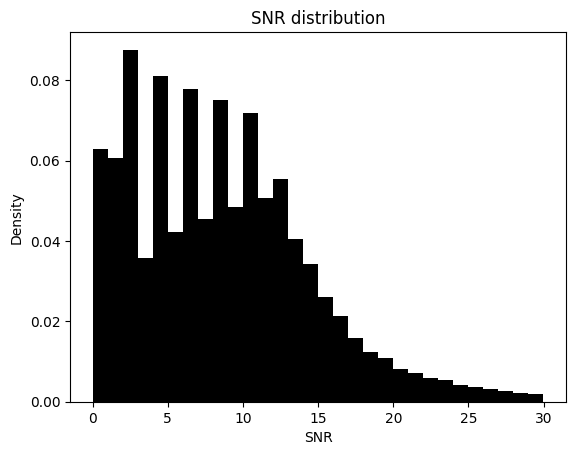

In [47]:
# plotting the SNR distribution (L1 detector)
test = np.array(unlensed_params["A1"])
test = test[test<30]
plt.hist(test, bins=30, color='k', density=True)
plt.xlabel("SNR")
plt.ylabel("Density")
plt.title("SNR distribution")
#plt.xlim(0, 100)
plt.show()

## CE

In [15]:
# initialize the LeR class
ler = LeR(
    npool=8,
    z_max=10,  # becareful with this value
    spin_zero=False,
    spin_precession=True,
    verbose=False,
    mtot_max=500,
    minimum_frequency=10,
    waveform_approximant='IMRPhenomXPHM',
    snr_type='inner_product',
    ifos=['CE'],
)

In [16]:
from gwsnr import GWSNR

snr = GWSNR(
    mtot_max=500,
    minimum_frequency=10,
    waveform_approximant='IMRPhenomXPHM',
    snr_type='inner_product',
    ifos=['CE'],
)


Chosen GWSNR initialization parameters:

npool:  4
snr type:  inner_product
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  10
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=10): 369.97199706893525
detectors:  ['CE']
psds:  [PowerSpectralDensity(psd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/CE_psd.txt', asd_file='None')]


In [17]:
## This is data collection based of 'optimal snr net' range
 
ler.batch_size = 100000

len_ = 0
while len_<100000:
    with contextlib.redirect_stdout(None):
        unlensed_params = ler.unlensed_cbc_statistics(size=100000, resume=False)
    snr = unlensed_params["optimal_snr_net"]

    idx = np.argwhere(snr>=0).flatten()

    unlensed_param_joint = {}

    len_idx = len(idx)

    for key, value in unlensed_params.items():
        unlensed_param_joint[key] = value[idx]

    append_json("optsnr_CE_1.json", unlensed_param_joint, replace=False)
    unlensed_params = get_param_from_json("optsnr_CE_1.json")
    len_ = len(unlensed_params["optimal_snr_net"])

    print(f"Number of events: {len_}")

100%|████████████████████████████████████████████████████████| 99126/99126 [05:07<00:00, 322.07it/s]


Number of events: 100000


## ET

In [19]:
# initialize the LeR class
ler = LeR(
    npool=8,
    z_max=10,  # becareful with this value
    spin_zero=False,
    spin_precession=True,
    verbose=False,
    mtot_max=500,
    minimum_frequency=10,
    waveform_approximant='IMRPhenomXPHM',
    snr_type='inner_product',
    ifos=['ET'],
)

In [20]:
from gwsnr import GWSNR

snr = GWSNR(
    mtot_max=500,
    minimum_frequency=10,
    waveform_approximant='IMRPhenomXPHM',
    snr_type='inner_product',
    ifos=['ET'],
)


Chosen GWSNR initialization parameters:

npool:  4
snr type:  inner_product
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  10
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=10): 369.97199706893525
detectors:  ['ET1', 'ET2', 'ET3']
psds:  [PowerSpectralDensity(psd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/ET_D_psd.txt', asd_file='None'), PowerSpectralDensity(psd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/ET_D_psd.txt', asd_file='None'), PowerSpectralDensity(psd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/ET_D_psd.txt', asd_file='None')]


In [21]:
## This is data collection based of 'optimal snr net' range
 
ler.batch_size = 100000

len_ = 0
while len_<100000:
    with contextlib.redirect_stdout(None):
        unlensed_params = ler.unlensed_cbc_statistics(size=100000, resume=False)
    snr = unlensed_params["optimal_snr_net"]

    idx = np.argwhere(snr>=0).flatten()

    unlensed_param_joint = {}

    len_idx = len(idx)

    for key, value in unlensed_params.items():
        unlensed_param_joint[key] = value[idx]

    append_json("optsnr_ET_1.json", unlensed_param_joint, replace=False)
    unlensed_params = get_param_from_json("optsnr_ET_1.json")
    len_ = len(unlensed_params["optimal_snr_net"])

    print(f"Number of events: {len_}")

100%|████████████████████████████████████████████████████████| 99087/99087 [05:32<00:00, 298.15it/s]


Number of events: 100000


In [94]:
72.40+33.3+76.30+6.50

193.3

In [99]:
6.50+76.30+33.3+74.89+56.4

247.39000000000001

In [98]:
930+520

1450

In [100]:
3153+3891+1923.51+1605.77

10573.28